In [8]:
# https://www.encyclopedia-titanica.org/titanic-passengers-and-crew/
data_path='../../../data/titanic/'
dataFile=data_path + 'titanicdata.htm'
import sys
import numpy as np
import pydotplus
from IPython.display import Image

In [9]:
from bs4 import BeautifulSoup
with open(dataFile,"rb") as f:
    soup = BeautifulSoup(f,"html.parser")

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [10]:
table = soup.find('table')

In [11]:
import pandas as pd
data = pd.read_html(str(table),flavor='bs4')[0]

In [12]:
data.head()

,Name,Age,Class/Dept,Ticket,Joined,Job,Boat [Body],Unnamed: 7
0,"ABī-AL-MUNà, Mr Nāsīf Qāsim",27,3rd Class Passenger,2699£18 15s 9d,Cherbourg,NaN,15,NaN
1,"ABBING, Mr Anthony",42,3rd Class Passenger,5547£7 11s,Southampton,Blacksmith,NaN,NaN
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,3rd Class Passenger,CA2673£20 5s,Southampton,NaN,A,NaN
3,"ABBOTT, Mr Rossmore Edward",16,3rd Class Passenger,CA2673£20 5s,Southampton,Jeweller,[190],NaN
4,"ABBOTT, Mr Eugene Joseph",13,3rd Class Passenger,CA2673£20 5s,Southampton,Scholar,NaN,NaN


In [13]:
data = data[["Name","Age","Class/Dept","Boat [Body]"]]

In [14]:
data['Boat [Body]'] = data['Boat [Body]'].replace(np.nan, '', regex = True)
data.head()

,Name,Age,Class/Dept,Boat [Body]
0,"ABī-AL-MUNà, Mr Nāsīf Qāsim",27,3rd Class Passenger,15
1,"ABBING, Mr Anthony",42,3rd Class Passenger,
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,3rd Class Passenger,A
3,"ABBOTT, Mr Rossmore Edward",16,3rd Class Passenger,[190]
4,"ABBOTT, Mr Eugene Joseph",13,3rd Class Passenger,


In [15]:
def checkPass(class_type):
    if "Passenger" in class_type:
        return "Passenger"
    else:
        return "Crew"
    
data["Crew/Pass"]=data["Class/Dept"].apply(checkPass)
data.head()

,Name,Age,Class/Dept,Boat [Body],Crew/Pass
0,"ABī-AL-MUNà, Mr Nāsīf Qāsim",27,3rd Class Passenger,15,Passenger
1,"ABBING, Mr Anthony",42,3rd Class Passenger,,Passenger
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,3rd Class Passenger,A,Passenger
3,"ABBOTT, Mr Rossmore Edward",16,3rd Class Passenger,[190],Passenger
4,"ABBOTT, Mr Eugene Joseph",13,3rd Class Passenger,,Passenger


In [16]:
def checkClass(class_type):
    if "Passenger" in class_type:
        return class_type.split(" ")[0]
    else:
        return "Crew"
    
data["Class"]=data["Class/Dept"].apply(checkClass)
data.head() 

,Name,Age,Class/Dept,Boat [Body],Crew/Pass,Class
0,"ABī-AL-MUNà, Mr Nāsīf Qāsim",27,3rd Class Passenger,15,Passenger,3rd
1,"ABBING, Mr Anthony",42,3rd Class Passenger,,Passenger,3rd
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,3rd Class Passenger,A,Passenger,3rd
3,"ABBOTT, Mr Rossmore Edward",16,3rd Class Passenger,[190],Passenger,3rd
4,"ABBOTT, Mr Eugene Joseph",13,3rd Class Passenger,,Passenger,3rd


In [17]:
data["Age"][data.Age == '11m'] = 1

In [18]:
def checkAdult(age):
    try:
        #print(age)
        if float(age) >= 18:
            return "Adult"
        else:
            return "Child"
    except Exception as e:
        print(e.args)
        print(age)
        sys.exit()

In [19]:
data["Adult/Child"]=data["Age"].apply(checkAdult)
data.head() 

,Name,Age,Class/Dept,Boat [Body],Crew/Pass,Class,Adult/Child
0,"ABī-AL-MUNà, Mr Nāsīf Qāsim",27,3rd Class Passenger,15,Passenger,3rd,Adult
1,"ABBING, Mr Anthony",42,3rd Class Passenger,,Passenger,3rd,Adult
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,3rd Class Passenger,A,Passenger,3rd,Adult
3,"ABBOTT, Mr Rossmore Edward",16,3rd Class Passenger,[190],Passenger,3rd,Child
4,"ABBOTT, Mr Eugene Joseph",13,3rd Class Passenger,,Passenger,3rd,Child


In [20]:
def checkGender(name):
    firstname = name[name.index(",")+2:]
    salutation = firstname.split(" ")[0]
    if salutation in ["Mr","Master"]:
        return "Male"
    else:
        return "Female"

In [21]:
data["Gender"]=data["Name"].apply(checkGender)
data.head() 

,Name,Age,Class/Dept,Boat [Body],Crew/Pass,Class,Adult/Child,Gender
0,"ABī-AL-MUNà, Mr Nāsīf Qāsim",27,3rd Class Passenger,15,Passenger,3rd,Adult,Male
1,"ABBING, Mr Anthony",42,3rd Class Passenger,,Passenger,3rd,Adult,Male
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,3rd Class Passenger,A,Passenger,3rd,Adult,Female
3,"ABBOTT, Mr Rossmore Edward",16,3rd Class Passenger,[190],Passenger,3rd,Child,Male
4,"ABBOTT, Mr Eugene Joseph",13,3rd Class Passenger,,Passenger,3rd,Child,Male


In [22]:
def checkSurvival(boat):
    if boat.strip()=="" or "[" in boat:
        return 0
    else:
        return 1
data["Survival"]=data["Boat [Body]"].apply(checkSurvival)
data.head() 

,Name,Age,Class/Dept,Boat [Body],Crew/Pass,Class,Adult/Child,Gender,Survival
0,"ABī-AL-MUNà, Mr Nāsīf Qāsim",27,3rd Class Passenger,15,Passenger,3rd,Adult,Male,1
1,"ABBING, Mr Anthony",42,3rd Class Passenger,,Passenger,3rd,Adult,Male,0
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,3rd Class Passenger,A,Passenger,3rd,Adult,Female,1
3,"ABBOTT, Mr Rossmore Edward",16,3rd Class Passenger,[190],Passenger,3rd,Child,Male,0
4,"ABBOTT, Mr Eugene Joseph",13,3rd Class Passenger,,Passenger,3rd,Child,Male,0


In [23]:
data.groupby(['Crew/Pass'])['Survival'].sum()*100/data.groupby(['Crew/Pass'])['Survival'].count()

Crew/Pass
Crew         13.586957
Passenger    35.798817
Name: Survival, dtype: float64

In [24]:
def compare(group,data):
    return data.groupby([group])['Survival'].sum()*100/data.groupby([group])['Survival'].count()

compare("Class",data)

Class
1st     57.428571
2nd     37.883959
3rd     24.259520
Crew    13.586957
Name: Survival, dtype: float64

In [25]:
compare("Gender",data)

Gender
Female    59.272097
Male      15.540181
Name: Survival, dtype: float64

In [26]:
compare("Adult/Child",data)

Adult/Child
Adult    25.078370
Child    33.183857
Name: Survival, dtype: float64

In [27]:
trainingData=data[["Age","Crew/Pass","Class","Adult/Child","Gender","Survival"]]
trainingData.head()

,Age,Crew/Pass,Class,Adult/Child,Gender,Survival
0,27,Passenger,3rd,Adult,Male,1
1,42,Passenger,3rd,Adult,Male,0
2,39,Passenger,3rd,Adult,Female,1
3,16,Passenger,3rd,Child,Male,0
4,13,Passenger,3rd,Child,Male,0


In [28]:
def catToNum(series):
    series = series.astype('category')
    return series.cat.codes

catData=trainingData[["Crew/Pass","Class","Adult/Child","Gender"]].apply(catToNum)
trainingData[["Crew/Pass","Class","Adult/Child","Gender"]]=catData
trainingData.head()

/home/renjith/anaconda3/envs/ml101/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Age,Crew/Pass,Class,Adult/Child,Gender,Survival
0,27,1,2,0,1,1
1,42,1,2,0,1,0
2,39,1,2,0,0,1
3,16,1,2,1,1,0
4,13,1,2,1,1,0


In [29]:
trainingData['Age'] = trainingData['Age'].apply(pd.to_numeric, errors='coerce')

/home/renjith/anaconda3/envs/ml101/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
len(trainingData)

2456

In [31]:
trainingData = trainingData.dropna()
len(trainingData)

2427

In [32]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(trainingData, test_size = 0.2)

In [33]:
train.head()

,Age,Crew/Pass,Class,Adult/Child,Gender,Survival
241,45.0,0,3,0,0,1
455,24.0,1,2,0,1,0
813,21.0,1,2,0,1,0
1229,29.0,1,2,0,1,1
732,23.0,0,3,0,0,0


In [34]:
test.head()

,Age,Crew/Pass,Class,Adult/Child,Gender,Survival
660,48.0,1,0,0,0,1
59,62.0,1,0,0,0,1
1612,17.0,1,2,1,1,0
917,26.0,1,2,0,1,0
803,23.0,1,2,0,1,0


In [35]:
len(train)

1941

In [36]:
len(test)

486

In [37]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_leaf_nodes=25)
clf=clf.fit(train[["Age","Crew/Pass","Class","Adult/Child","Gender"]],train["Survival"])

In [38]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=25,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
clf.feature_importances_

array([0.20371557, 0.        , 0.24369952, 0.        , 0.55258491])

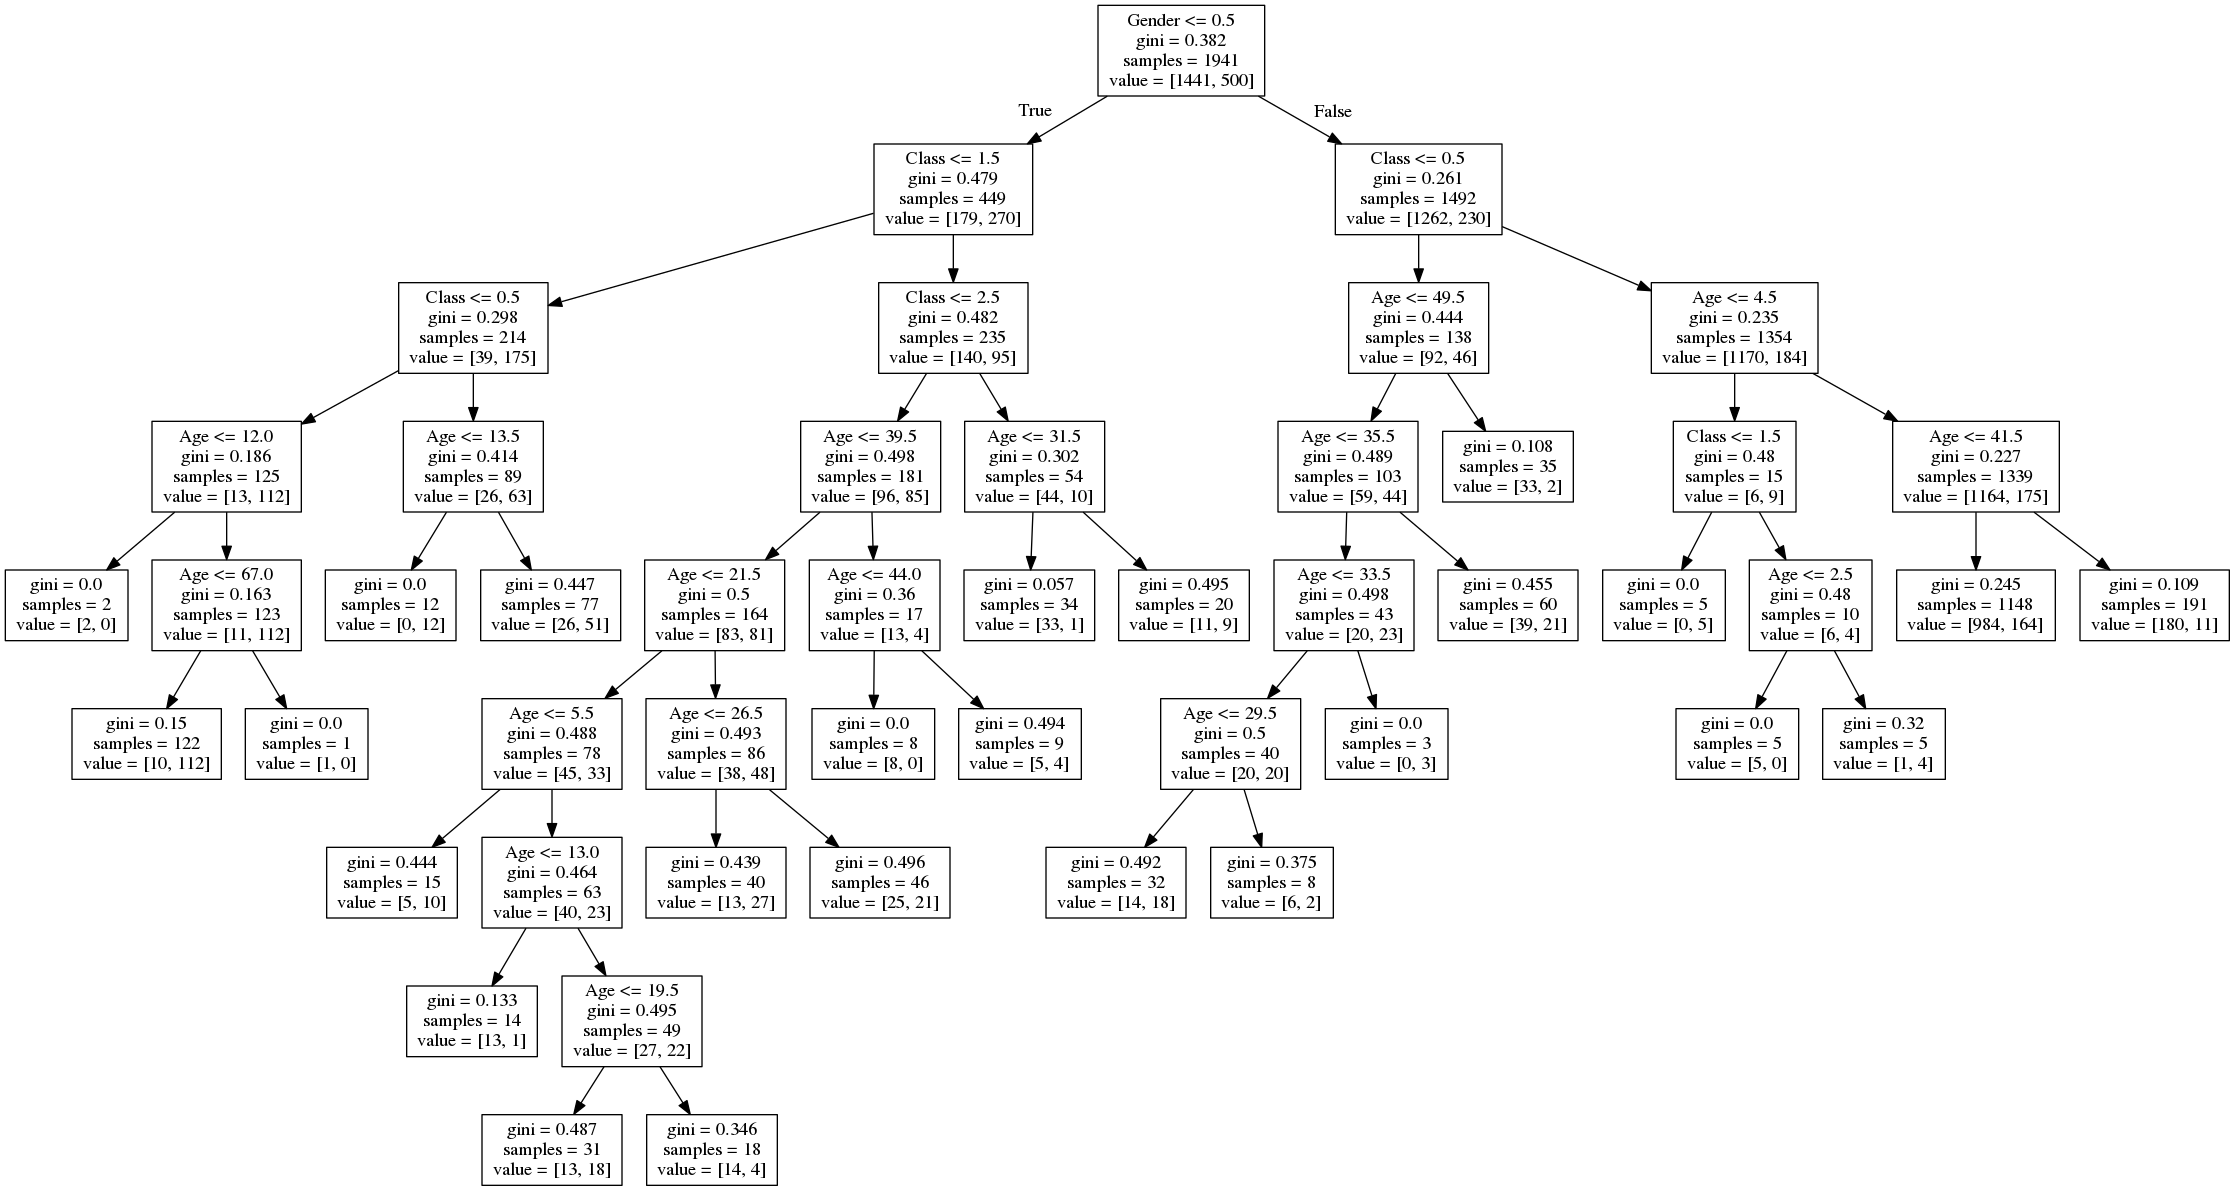

In [42]:
from sklearn import tree
#with open("titanic.dot","w") as f:
#    f = tree.export_graphviz(clf, feature_names=["Age","Crew/Pass","Class","Adult/Child","Gender"],out_file=f)
f = tree.export_graphviz(clf, feature_names=["Age","Crew/Pass","Class","Adult/Child","Gender"],out_file=None)

# Draw graph
graph = pydotplus.graph_from_dot_data(f)

# Show graph
Image(graph.create_png())

In [43]:
predictions = clf.predict(test[["Age","Crew/Pass","Class","Adult/Child","Gender"]])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(test["Survival"], predictions)

0.8189300411522634

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000,max_leaf_nodes=15)

In [46]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=15,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
def checkAccuracy(clf):
    clf=clf.fit(train[["Age","Crew/Pass","Class","Adult/Child","Gender"]],train["Survival"])
    predictions = clf.predict(test[["Age","Crew/Pass","Class","Adult/Child","Gender"]])
    return accuracy_score(test["Survival"], predictions)

In [48]:
checkAccuracy(clf) 

0.8251028806584362